In [1]:
import pandas as pd

annotations = sorted([
               'peternakan'
               ])
from BIOtagging import text_to_tagReadyDF, convert_to_spaCyformat

In [6]:
import pandas as pd

df = pd.read_excel('C:/Users/userk/OneDrive/Documents/development/research/NER/dataset.xlsx')
# lower case value on column desc
df['desc'] = df['desc'].str.lower()
# tokenize value on column desc
df['desc'] = df['desc'].apply(lambda x: x.split())
desc_list = []
bio_tagging_list = []
ner_tagging_list = ['sayuran','ternak','unggas','tani','padi','pupuk','sayur','sapi','ikan','asin','karet','sawit' ,'tebu','buah']
# loop through each row in df
for i in range(len(df)):
  # loop through each token in each row
  for j in range(len(df['desc'][i])):
    desc = df['desc'][i][j]
    # if desc is in ner_tagging_list
    if desc in ner_tagging_list:
      # add desc to desc_list
      desc_list.append(desc)
      # add 'B-nama' to bio_tagging_list
      bio_tagging_list.append('B-peternakan')
    else:
        # add desc to desc_list
        desc_list.append(desc)
        # add 'O' to bio_tagging_list
        bio_tagging_list.append('O')
    desc_list.append(' ')
    bio_tagging_list.append('O')
    
# create new dataframe
df = pd.DataFrame({'token_0': desc_list, 'BIO_tag_0': bio_tagging_list})
# save to csv
df.to_csv('C:/Users/userk/OneDrive/Documents/development/research/NER/text_tagged_pti.csv', index=False)

In [2]:
# import BIO-tagged csv file
link_BIOtagged_file = "C:/Users/userk/OneDrive/Documents/development/research/NER/text_tagged_pti.csv"
df_tagged = pd.read_csv(link_BIOtagged_file)
# lowercase value on column BIO_tag_0
df_tagged['BIO_tag_0'] = df_tagged['BIO_tag_0'].str.lower()
# delete rows with value 'B-nama, I-nama' on column BIO_tag_0
df_tagged = df_tagged[df_tagged['BIO_tag_0'] != 'b-nama']
df_tagged = df_tagged[df_tagged['BIO_tag_0'] != 'i-nama']
BIO_tag_0_list = []
token_0_list = []
for i in range(len(df_tagged)):
  # add bio_tag_0 to list
  BIO_tag_0_list.append(df_tagged['BIO_tag_0'][i])
  BIO_tag_0_list.append('O')
  token_0_list.append(df_tagged['token_0'][i])
  token_0_list.append(' ')
# create new dataframe
df_tagged_new = pd.DataFrame({'token_0': token_0_list, 'BIO_tag_0': BIO_tag_0_list})
train_data = convert_to_spaCyformat(df_tagged, annotations)
from train_spacy import train_spacy
scorer = ()
model, loss, scorer = train_spacy([train_data], 100) # using 100 iterations

Starting iteration 0
{'ner': 119.99999666213989}
Starting iteration 1
{'ner': 113.15135538578033}
Starting iteration 2
{'ner': 107.2668297290802}
Starting iteration 3
{'ner': 100.25704669952393}
Starting iteration 4
{'ner': 91.17488116025925}
Starting iteration 5
{'ner': 83.67287105321884}
Starting iteration 6
{'ner': 76.05740115046501}
Starting iteration 7
{'ner': 65.6993937343359}
Starting iteration 8
{'ner': 61.663254752755165}
Starting iteration 9
{'ner': 56.42707771807909}
Starting iteration 10
{'ner': 53.977900959551334}
Starting iteration 11
{'ner': 58.833566416054964}
Starting iteration 12
{'ner': 58.73360168747604}
Starting iteration 13
{'ner': 59.30723087862134}
Starting iteration 14
{'ner': 52.57290628738701}
Starting iteration 15
{'ner': 52.211873434484005}
Starting iteration 16
{'ner': 48.20657806098461}
Starting iteration 17
{'ner': 46.23406957834959}
Starting iteration 18
{'ner': 47.75359505414963}
Starting iteration 19
{'ner': 43.713348388671875}
Starting iteration 20
{

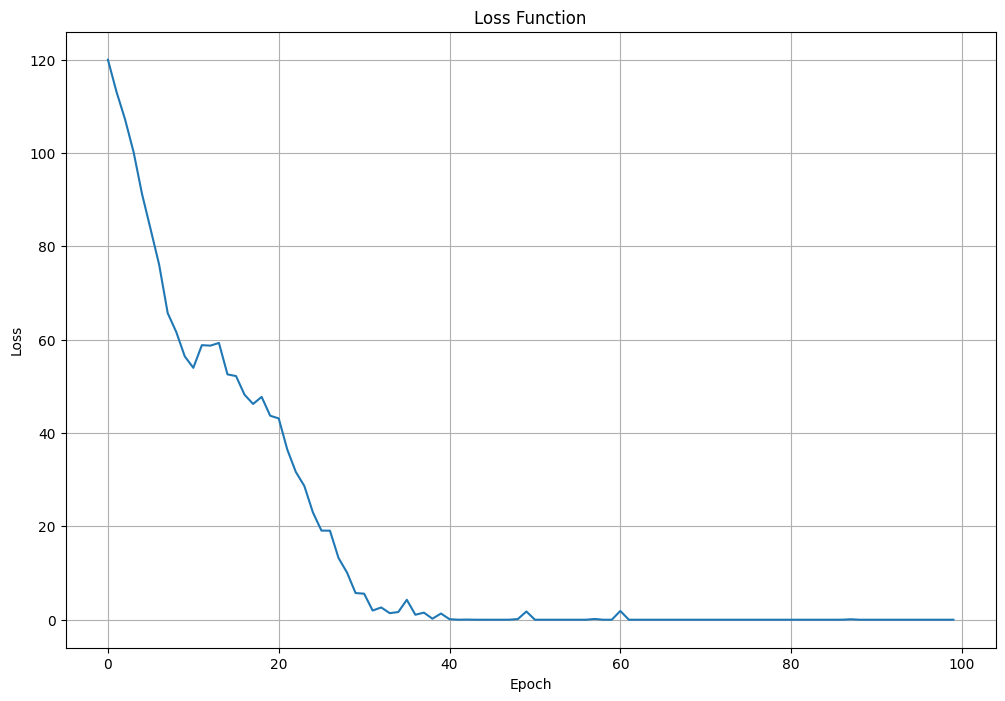

In [7]:
# we'd like to plot loss
from matplotlib import pyplot as plt

# plotting loss
plt.figure(figsize=(12,8))
plt.plot([i['ner'] for i in loss])
plt.grid()
plt.title('Loss Function')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show()